In [1]:
# Install the required libraries

!pip install numpy==1.26.0


In [2]:
!pip uninstall tensorflow -y


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0


In [3]:
!pip install tensorflow==2.18.0
!pip install FuzzyTM>=0.4.0


  Using cached tensorflow-2.18.0-cp310-cp310-macosx_12_0_arm64.whl (239.4 MB)
zsh:1: 0.4.0 not found


In [4]:
!pip uninstall PyQt5 -y
!pip uninstall PyQt5-sip -y



Found existing installation: PyQt5 5.15.11
Uninstalling PyQt5-5.15.11:
  Successfully uninstalled PyQt5-5.15.11
Found existing installation: PyQt5_sip 12.16.1
Uninstalling PyQt5_sip-12.16.1:
  Successfully uninstalled PyQt5_sip-12.16.1


In [5]:
!pip install PyQt5==5.15.11



  Using cached PyQt5-5.15.11-cp38-abi3-macosx_11_0_arm64.whl (6.6 MB)
  Using cached PyQt5_sip-12.16.1-cp310-cp310-macosx_10_9_universal2.whl (122 kB)


In [6]:
!pip install PyQt5-sip>=12.15,<13

zsh:1: 12.15, not found


In [7]:
!pip show PyQt5


Name: PyQt5
Version: 5.15.11
Summary: Python bindings for the Qt cross platform application toolkit
Home-page: 
Author: 
Author-email: Riverbank Computing Limited <info@riverbankcomputing.com>
License: GPL v3
Location: /Users/tanyashetty/anaconda3/lib/python3.10/site-packages
Requires: PyQt5-Qt5, PyQt5-sip
Required-by: PyQtWebEngine, spyder


In [8]:
import tensorflow as tf
print(tf.__version__)  # Should print the version of TensorFlow (e.g., 2.18.0)


2.18.0


In [9]:
import numpy as np
print(np.__version__)  # Should print the version of numpy (e.g., 1.26.0)


1.26.0


In [10]:
pip install numpy matplotlib pillow


Note: you may need to restart the kernel to use updated packages.


In [11]:
#importing all the necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt



In [12]:
# Function to check for corrupted images
def check_images(directory):
    invalid_images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        img.verify()  # Verifies if the image can be opened without errors
                except (IOError, SyntaxError) as e:
                    invalid_images.append(file_path)  # Collect paths of corrupted images
    return invalid_images



# Run the check on your images
corrupted_images = check_images('/Users/tanyashetty/Documents/AI Project/PetImages')

# Display the corrupted image paths (if any)
if corrupted_images:
    print("Corrupted images found:")
    for image in corrupted_images:
        print(image)
else:
    print("No corrupted images found.")


/Users/tanyashetty/anaconda3/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


No corrupted images found.


In [13]:
# Function to remove corrupted images
def remove_corrupted_images(corrupted_images):
    for image in corrupted_images:
        try:
            os.remove(image)  # Deletes the corrupted image file
            print(f"Removed corrupted image: {image}")
        except Exception as e:
            print(f"Error removing {image}: {e}")

# Remove the corrupted images
remove_corrupted_images(corrupted_images)


In [14]:
#Adjust Data Generators


# flow_from_directory: This method will automatically assign class labels based on the folder names (Cat and Dog), and it will use them for binary classification. Keras will assign 0 for the Cat folder and 1 for the Dog folder.
# validation_split=0.2: Using 20% of the images as the validation set.
#subset='training' and subset='validation': This ensures that we split the dataset into training and validation sets (80% for training, 20% for validation).


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image size for the pre-trained model
image_size = (224, 224)

# Initialize ImageDataGenerator for training with rescaling and validation split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    '/Users/tanyashetty/Documents/AI Project/PetImages',  # Path to your dataset folder (PetImages)
    target_size=image_size,
    batch_size=32,
    class_mode='binary',  # Binary classification (cats vs dogs)
    subset='training'     # Use only the training subset
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    '/Users/tanyashetty/Documents/AI Project/PetImages',  # Same folder for validation subset
    target_size=image_size,
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='validation'   # Use only the validation subset
)


Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [15]:
# Creating the model

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

#Load pre-trained MobileNetV2 model (without the top classification layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Freeze the base model (don't train its weights)
base_model.trainable = False

# Add custom layers on top for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
# Training the model 

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,  # Number of steps per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32  # Number of validation steps
)


Epoch 1/10


/Users/tanyashetty/anaconda3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 339s 539ms/step - accuracy: 0.9682 - loss: 0.0895 - val_accuracy: 0.9820 - val_loss: 0.0453
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 337s 539ms/step - accuracy: 0.9847 - loss: 0.0405 - val_accuracy: 0.9826 - val_loss: 0.0445
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 355s 568ms/step - accuracy: 0.9887 - loss: 0.0296 - val_accuracy: 0.9836 - val_loss: 0.0421
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 351s 562ms/step - accuracy: 0.9921 - loss: 0.0196 - val_accuracy: 0.9824 - val_loss: 0.0511
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 343s 549ms/step - accuracy: 0.9939 - loss: 0.0165 - val_accuracy: 0.9798 - val_loss: 0.0698
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 516ms/step - accuracy: 0.9937 - loss: 0.0155 - val_accuracy: 0.9808 - val_loss: 0.0745
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 327s 523ms/step - accuracy: 0.9964 - loss: 0.0091 - val_accuracy: 0.9834 - val_loss: 0.0581
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 309s 494ms/step - accuracy: 0.9984 - loss: 0.00

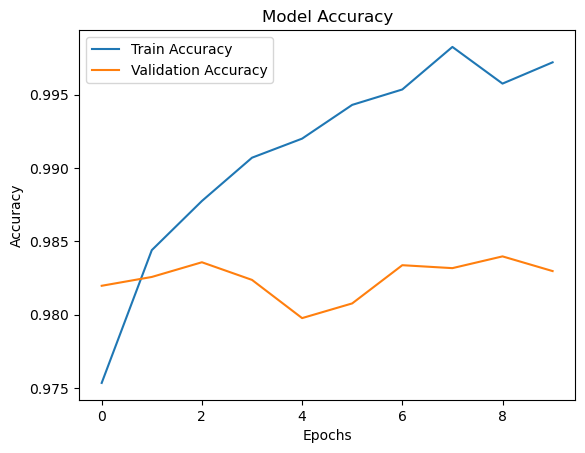

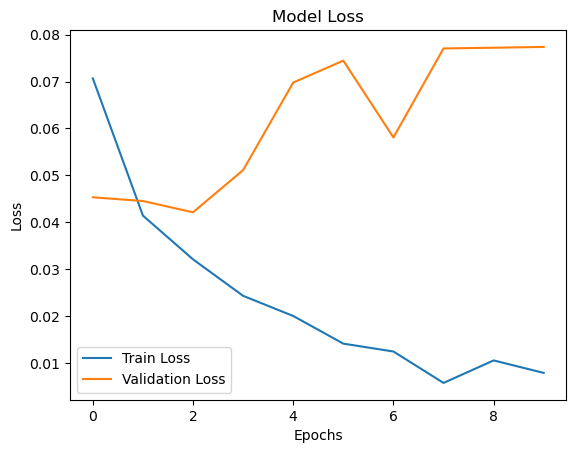

In [17]:
# Plotting the accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plotting the loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [18]:
# Save the model in the new .keras format
model.save('cat_dog_model.keras')



In [38]:
# Saved the A-Cat image locally 
img_path = '/Users/tanyashetty/Documents/AI Project/D.jpg'


In [39]:
# Testing the prediction of the web sourced image

from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('cat_dog_model.keras')  # Or 'cat_dog_model.h5' if you saved in that format

# Load the image for prediction
img_path = '/Users/tanyashetty/Documents/AI Project/D.jpg'  # Path to your downloaded or saved image
img = image.load_img(img_path, target_size=(224, 224))  # Resize the image
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize the image array (same as during training)
img_array = img_array / 255.0

# Make the prediction
prediction = model.predict(img_array)

# Print the prediction result
if prediction[0] > 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
Prediction: Dog
